In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import zscore

# Outlier detection
from scipy.stats import zscore


In [ ]:
encoder = LabelEncoder()

dataset['State'] = encoder.fit_transform(dataset['State'])

In [48]:
df = pd.read_csv(r"C:\Users\BAPS\Downloads\archive (12)\Food_Delivery_Times.csv")

In [49]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [4]:
df.head(10)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
5,679,19.40,Clear,Low,Evening,Scooter,8,9.0,57
6,627,9.52,Clear,Low,NaN,Bike,12,1.0,49
7,514,17.39,Clear,Medium,Evening,Scooter,5,6.0,46
8,860,1.78,Snowy,Low,Evening,Car,20,6.0,35
9,137,10.62,Foggy,Low,Evening,Scooter,29,1.0,73


In [5]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [6]:
df.drop(columns=['Order_ID'],inplace=True)

In [7]:

# -----------------------------
categorical_cols = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)


In [8]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,0,0,0,1,1,0,0,0,0,0,1
1,16.42,20,2.0,84,0,0,0,0,0,1,1,0,0,0,0
2,9.52,28,1.0,59,1,0,0,0,1,0,0,0,1,0,1
3,7.44,5,1.0,37,0,1,0,0,0,1,0,0,0,0,1
4,19.03,16,5.0,68,0,0,0,0,1,0,0,1,0,0,0


In [9]:
df.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
count,1000.000000,1000.000000,970.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.059970,16.982000,4.579381,56.732000,0.103000,0.204000,0.097000,0.096000,0.383000,0.390000,0.293000,0.308000,0.085000,0.195000,0.302000
std,5.696656,7.204553,2.914394,22.070915,0.304111,0.403171,0.296106,0.294739,0.486362,0.487994,0.455366,0.461898,0.279021,0.396399,0.459355
min,0.590000,5.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.105000,11.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.190000,17.000000,5.000000,55.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.017500,23.000000,7.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,19.990000,29.000000,9.000000,153.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

Distance_km                0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
Weather_Foggy              0
Weather_Rainy              0
Weather_Snowy              0
Weather_Windy              0
Traffic_Level_Low          0
Traffic_Level_Medium       0
Time_of_Day_Evening        0
Time_of_Day_Morning        0
Time_of_Day_Night          0
Vehicle_Type_Car           0
Vehicle_Type_Scooter       0
dtype: int64

In [11]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs']).mean()

In [12]:
# df['air qality index'] = df['air qality index'].ffill(axis=0)
# df['air qality index'] = df['air qality index'].fillna(method = 'bfill')
# df['air qality index'] = df['air qality index'].fillna(0)
# df['air qality index'] = df['air qality index'].fillna(df['air qality index'].mean())
# df['air qality index'] = df['air qality index'].fillna(df['air qality index'].median())
# df['air qality index'] = df['air qality index'].fillna(df['air qality index'].mode()[0])
# df = df.fillna(df.mean())

In [12]:
df.isnull().sum()

Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Traffic_Level_Low         0
Traffic_Level_Medium      0
Time_of_Day_Evening       0
Time_of_Day_Morning       0
Time_of_Day_Night         0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
dtype: int64

In [13]:
df.columns

Index(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy',
       'Weather_Windy', 'Traffic_Level_Low', 'Traffic_Level_Medium',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Vehicle_Type_Car', 'Vehicle_Type_Scooter'],
      dtype='object')

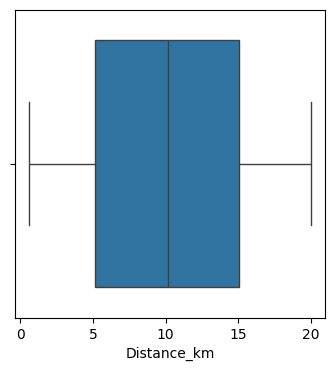

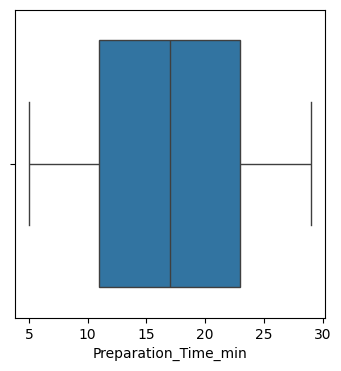

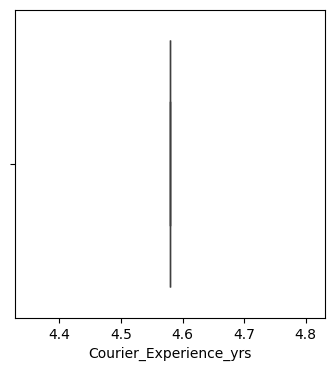

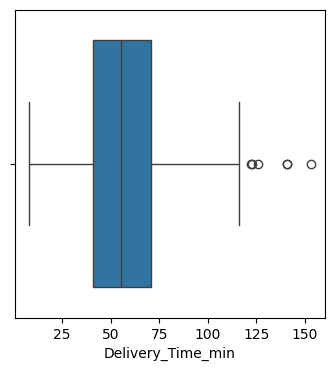

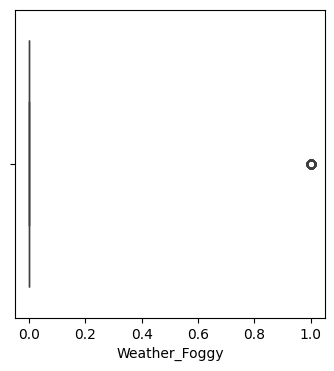

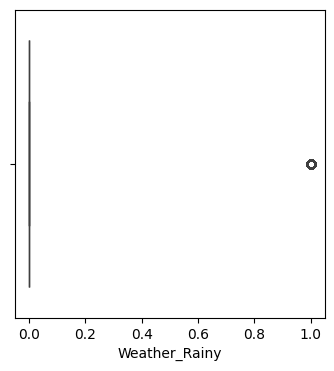

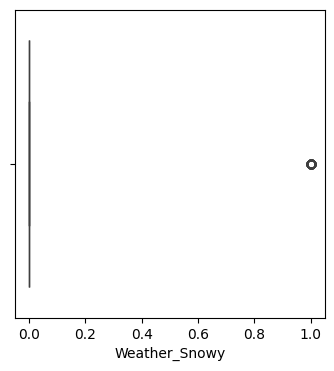

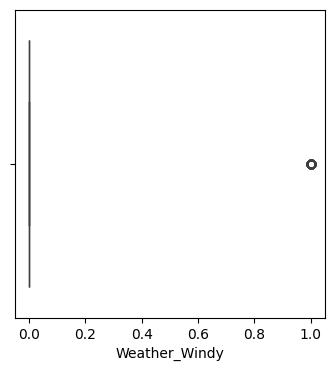

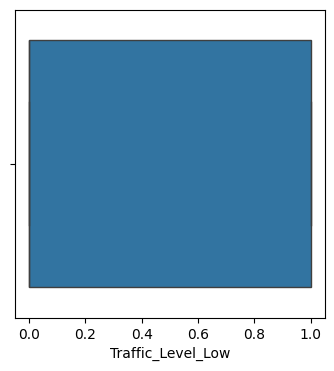

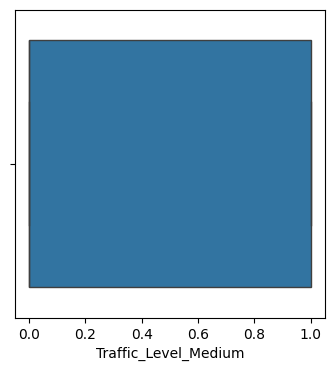

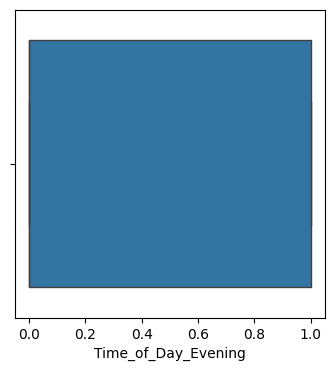

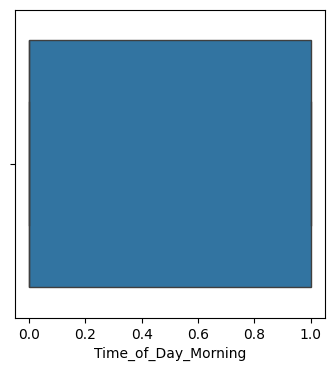

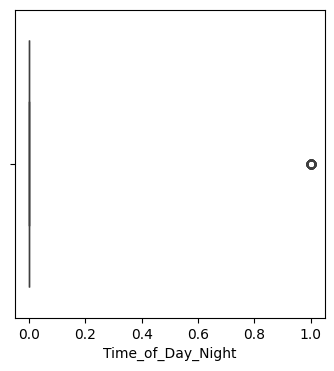

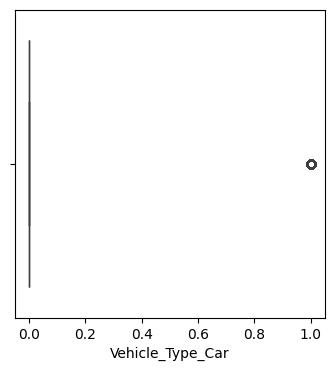

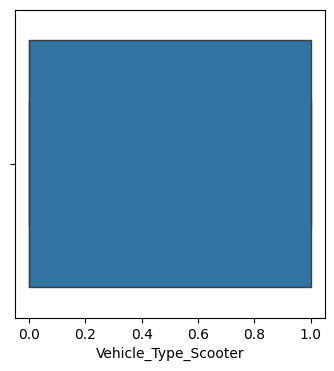

In [14]:
num = df.select_dtypes(include=np.number).columns
for col in num:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[col],data=df)

In [15]:
df.columns

Index(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy',
       'Weather_Windy', 'Traffic_Level_Low', 'Traffic_Level_Medium',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Vehicle_Type_Car', 'Vehicle_Type_Scooter'],
      dtype='object')

In [16]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,4.579381,43,0,0,0,1,1,0,0,0,0,0,1
1,16.42,20,4.579381,84,0,0,0,0,0,1,1,0,0,0,0
2,9.52,28,4.579381,59,1,0,0,0,1,0,0,0,1,0,1
3,7.44,5,4.579381,37,0,1,0,0,0,1,0,0,0,0,1
4,19.03,16,4.579381,68,0,0,0,0,1,0,0,1,0,0,0


In [17]:
# Calculate z-scores for the 'Starting_Salary' column
print('Before outlier removal : ',df.shape)
min = zscore(df['Delivery_Time_min'])

# Define a threshold for identifying outliers
threshold = 3
 
# Find outliers only in the 'Starting_Salary' column
outlier_Price = df[(np.abs(min) > threshold)]
 
print(f"\nNumber of outliers found in 'delivery_min' using a threshold of {threshold}: {len(outlier_Price)}")
# print("\n",outliers_salary)
 
# Remove outliers from the dataset
df = df[(np.abs(min) <= threshold)]
print('\nAfter Z-Score approach (outliers in Price removed) : ',df.shape)

Before outlier removal :  (1000, 15)

Number of outliers found in 'delivery_min' using a threshold of 3: 5

After Z-Score approach (outliers in Price removed) :  (995, 15)


In [18]:
num = df.select_dtypes(include='number')
skew = num.skew()
print(skew)

Distance_km               0.046702
Preparation_Time_min      0.032507
Courier_Experience_yrs    0.000000
Delivery_Time_min         0.338191
Weather_Foggy             2.606942
Weather_Rainy             1.478872
Weather_Snowy             2.718091
Weather_Windy             2.737509
Traffic_Level_Low         0.486849
Traffic_Level_Medium      0.447614
Time_of_Day_Evening       0.913845
Time_of_Day_Morning       0.830266
Time_of_Day_Night         2.970840
Vehicle_Type_Car          1.550269
Vehicle_Type_Scooter      0.866362
dtype: float64


In [19]:
num = df.select_dtypes(include='number')
kurt = num.kurt()
print(kurt)

Distance_km              -1.223748
Preparation_Time_min     -1.237248
Courier_Experience_yrs    0.000000
Delivery_Time_min        -0.321674
Weather_Foggy             4.805805
Weather_Rainy             0.187436
Weather_Snowy             5.398866
Weather_Windy             5.505017
Traffic_Level_Low        -1.766533
Traffic_Level_Medium     -1.803270
Time_of_Day_Evening      -1.167237
Time_of_Day_Morning      -1.313303
Time_of_Day_Night         6.839635
Vehicle_Type_Car          0.404141
Vehicle_Type_Scooter     -1.251937
dtype: float64


In [20]:
df.head()


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,4.579381,43,0,0,0,1,1,0,0,0,0,0,1
1,16.42,20,4.579381,84,0,0,0,0,0,1,1,0,0,0,0
2,9.52,28,4.579381,59,1,0,0,0,1,0,0,0,1,0,1
3,7.44,5,4.579381,37,0,1,0,0,0,1,0,0,0,0,1
4,19.03,16,4.579381,68,0,0,0,0,1,0,0,1,0,0,0


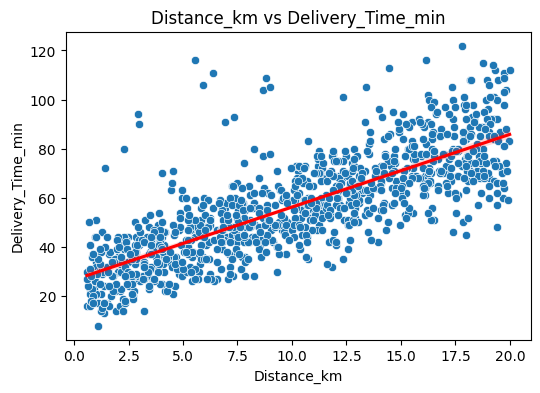

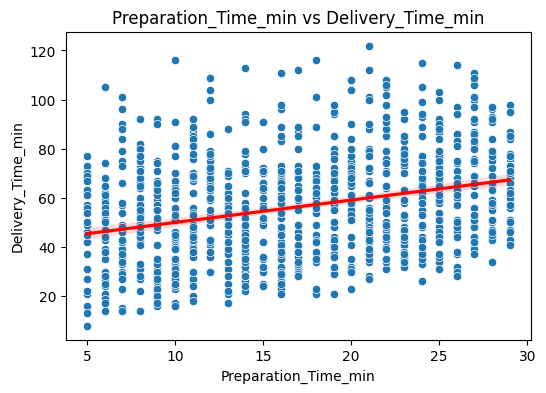

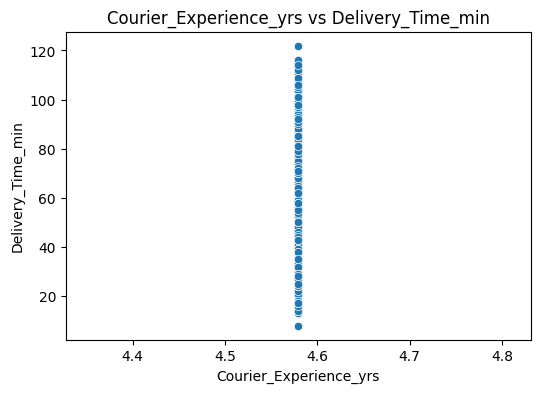

KeyError: 'Weather'

<Figure size 600x400 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
target = 'Delivery_Time_min'

# Scatter plots for numeric features
for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df[target])
    sns.regplot(x=df[feature], y=df[target], scatter=False, color='red')  # regression line
    plt.title(f'{feature} vs {target}')
    plt.show()

# Box plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs {target}')
    plt.show()


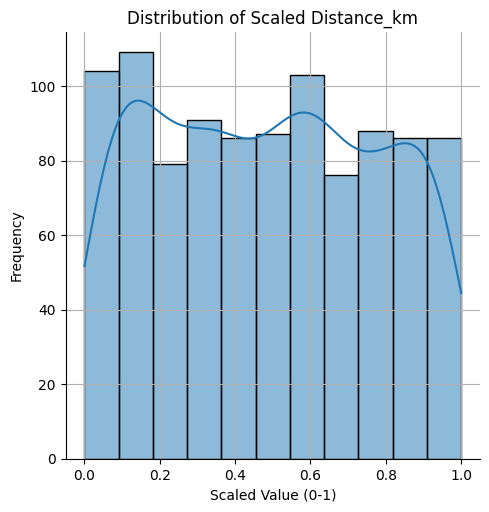

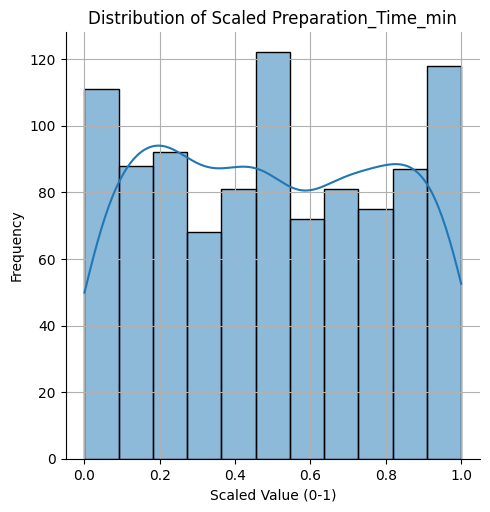

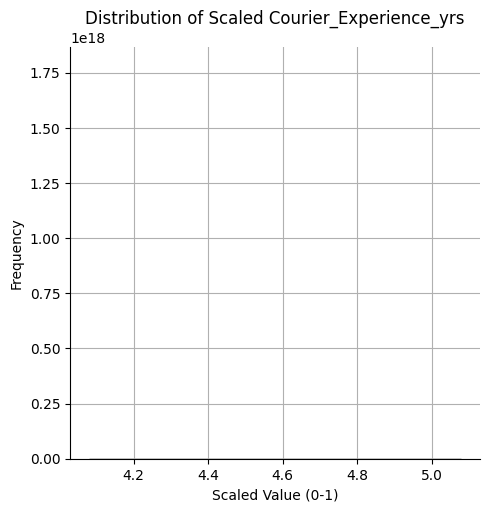

In [ ]:


# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# # Apply MinMaxScaler to selected features
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']])

# # Create DataFrame with the same column names
# ddf = pd.DataFrame(scaled_data, columns=['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs'])

# # Plot distribution for each scaled feature
# for col in ddf.columns:
#     sns.displot(data=ddf, x=col, kde=True)
#     plt.title(f'Distribution of Scaled {col}')
#     plt.xlabel('Scaled Value (0-1)')
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()




import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to selected features
scaler = MinMaxScaler()
df[['Distance_km', 'Preparation_Time_min']] = scaler.fit_transform(
    df[['Distance_km', 'Preparation_Time_min']]
)

#  Now df contains the scaled values directly

# Plot distribution for each scaled feature
for col in ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']:
    sns.displot(data=df, x=col, kde=True)
    plt.title(f'Distribution of Scaled {col}')
    plt.xlabel('Scaled Value (0-1)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



In [ ]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,0.378351,0.291667,4.579381,43,0,0,0,1,1,0,0,0,0,0,1
1,0.815979,0.625000,4.579381,84,0,0,0,0,0,1,1,0,0,0,0
2,0.460309,0.958333,4.579381,59,1,0,0,0,1,0,0,0,1,0,1
3,0.353093,0.000000,4.579381,37,0,1,0,0,0,1,0,0,0,0,1
4,0.950515,0.458333,4.579381,68,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
df['Courier_Experience_yrs'].value_counts()

Courier_Experience_yrs
4.579381    995
Name: count, dtype: int64

<AxesSubplot: xlabel='Delivery_Time_min'>

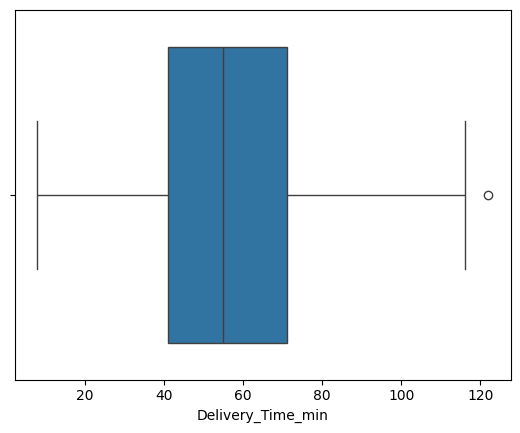

In [ ]:

sns.boxplot(x=df['Delivery_Time_min'],data=df)

In [22]:
# res = dataset_cleaned.select_dtypes(include=np.number).columns
# for column in res:
#     plt.figure(figsize=(4,4))
#     sns.displot(dataset_cleaned[col],color='red',kind='kde')

In [23]:
x = df.drop('Delivery_Time_min',axis=1)
y = df['Delivery_Time_min']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(796, 14)
(199, 14)
(796,)
(199,)


In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_testpred = lr_model.predict(X_test)
y_trainpred = lr_model.predict(X_train)

In [28]:
X_train.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
914,16.23,6,4.579381,0,0,0,0,0,1,1,0,0,0,0
930,7.34,22,4.579381,1,0,0,0,0,1,0,0,0,0,0
979,19.74,11,4.579381,0,1,0,0,0,0,0,0,0,0,1
769,10.10,17,4.579381,0,0,0,0,0,0,0,1,0,1,0
916,18.33,19,4.579381,1,0,0,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y_train,y_trainpred))
print(r2_score(Y_test,y_testpred))

0.7739652577173067
0.8331163186811268


In [30]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,Y_train)
y_pred1 = dt.predict(X_train)
y_pred2 = dt.predict(X_test)
print(r2_score(Y_train,y_pred1))
print(r2_score(Y_test,y_pred2))

1.0
0.4593410005500025


In [31]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Split features and target
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Lasso model (no hyperparameter tuning)
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

# Predictions
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Metrics
print("Training R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

# Coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print("\nLasso Coefficients:")
print(coef_df)


Training R2: 0.7241731401794995
Test R2: 0.7937599692849364
RMSE: 10.48948514256847
MAE: 7.197432540250375

Lasso Coefficients:
                   Feature  Coefficient
0              Distance_km     2.920696
1     Preparation_Time_min     0.883247
2   Courier_Experience_yrs     0.000000
3            Weather_Foggy     0.000000
4            Weather_Rainy     0.000000
5            Weather_Snowy     0.000000
6            Weather_Windy    -0.000000
7        Traffic_Level_Low    -3.361621
8     Traffic_Level_Medium    -0.000000
9      Time_of_Day_Evening     0.000000
10     Time_of_Day_Morning    -0.000000
11       Time_of_Day_Night     0.000000
12        Vehicle_Type_Car     0.000000
13    Vehicle_Type_Scooter    -0.000000


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
 
# Define model
dt = DecisionTreeRegressor(random_state=42)
 
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}
 
# GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)
 
# Fit model
grid_search.fit(X_train, y_train)
 
# Best model
best_dt = grid_search.best_estimator_
 
# Predict
y_predict_train = best_dt.predict(X_train)
y_predict_test = best_dt.predict(X_test)
 
# Scores
from sklearn.metrics import r2_score
print("Train R2:", r2_score(Y_train, y_predict_train))
print("Test R2 :", r2_score(Y_test, y_predict_test))
print("Best Parameters:", grid_search.best_params_)
 

 

Train R2: 0.7573440010820935
Test R2 : 0.7225764128083476
Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define model (default params)
rf_model = RandomForestRegressor(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predictions
y_predict_rf_train = rf_model.predict(X_train)
y_predict_rf_test = rf_model.predict(X_test)

# R² Scores
print("Train R²:", r2_score(y_train, y_predict_rf_train))
print("Test R²:", r2_score(y_test, y_predict_rf_test))


Train R²: 0.9577653179917842
Test R²: 0.7782709415028414


In [38]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,   # try 30 random combinations
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Test set evaluation
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best CV Score: 0.7068884194441223
Test R²: 0.7865724277084114


In [34]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Base model
base_tree = DecisionTreeRegressor(max_depth=3)

# AdaBoost Regressor
ada = AdaBoostRegressor(
    estimator=base_tree,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ada.fit(X_train, y_train)
y_pred3 = ada.predict(X_train)
y_pred = ada.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("R²:", r2_score(y_train,y_pred3))


R²: 0.6817027231838324
R²: 0.7088878186492525


In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
xg = XGBRegressor()
xg.fit(x_train, y_train)
 
y_pred_train = xg.predict(x_train)
y_pred = xg.predict(x_test)
 
r2 = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred, y_test)
 
print(r2)
print(r2_test)

0.9969120025634766
0.5154541730880737


In [41]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],        # number of boosting rounds (trees)
    "learning_rate": [0.01, 0.05, 0.1],    # step size shrinkage
    "max_depth": [3, 4, 5],                # depth of trees
    "subsample": [0.8, 1.0],               # fraction of samples for training
    "colsample_bytree": [0.8, 1.0],        # fraction of features per tree
    "min_child_weight": [1, 3, 5],         # min sum of instance weight in a child
    "gamma": [0, 0.1, 0.3]                 # min loss reduction for split
}

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

# Fit
grid.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Best CV R²: -0.003357553482055664
Test R²: 0.008389890193939209


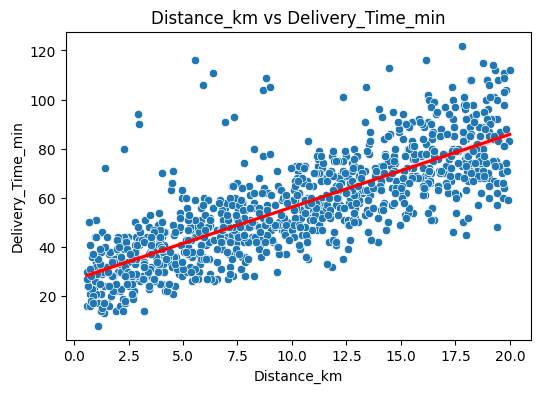

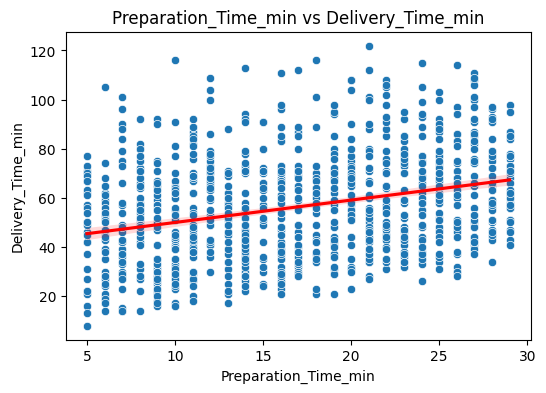

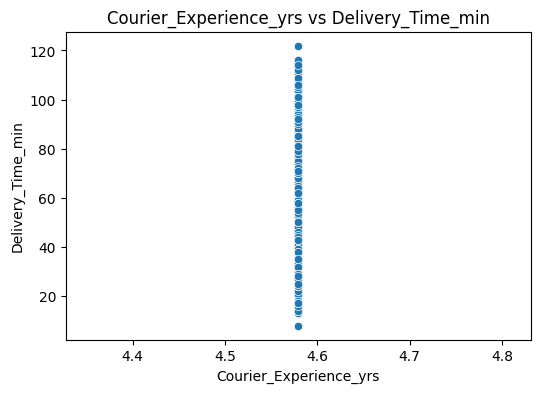

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
target = 'Delivery_Time_min'

# Scatter plots for numeric features
for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df[target])
    sns.regplot(x=df[feature], y=df[target], scatter=False, color='red')  # regression line
    plt.title(f'{feature} vs {target}')
    plt.show()



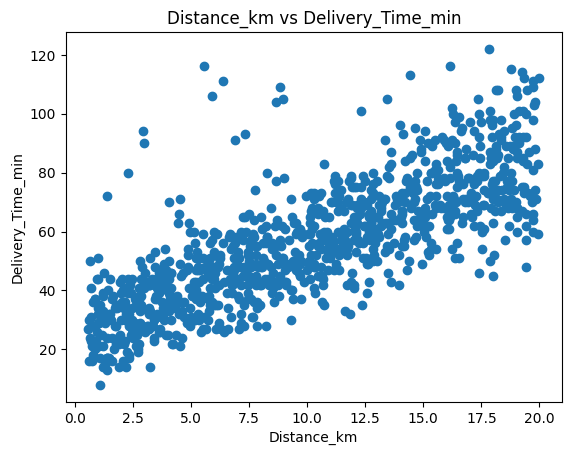

KeyError: 'Traffic_Level'

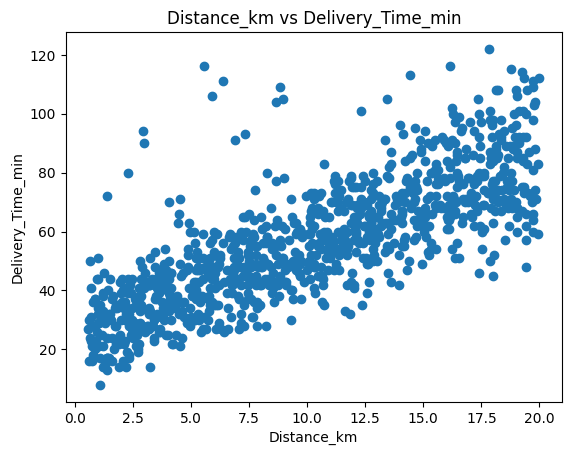

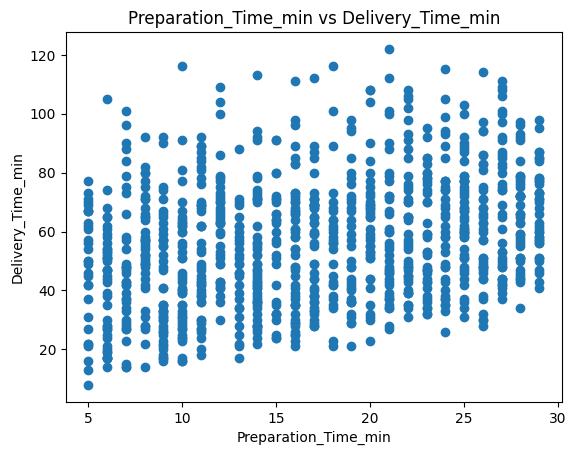

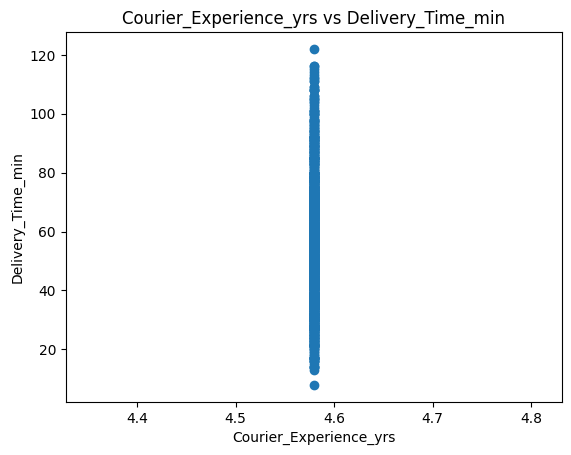

In [41]:
import matplotlib.pyplot as plt

for col in ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]:
    plt.scatter(df[col], df["Delivery_Time_min"])
    plt.xlabel(col)
    plt.ylabel("Delivery_Time_min")
    plt.title(f"{col} vs Delivery_Time_min")
    plt.show()


In [40]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,4.579381,43,0,0,0,1,1,0,0,0,0,0,1
1,16.42,20,4.579381,84,0,0,0,0,0,1,1,0,0,0,0
2,9.52,28,4.579381,59,1,0,0,0,1,0,0,0,1,0,1
3,7.44,5,4.579381,37,0,1,0,0,0,1,0,0,0,0,1
4,19.03,16,4.579381,68,0,0,0,0,1,0,0,1,0,0,0


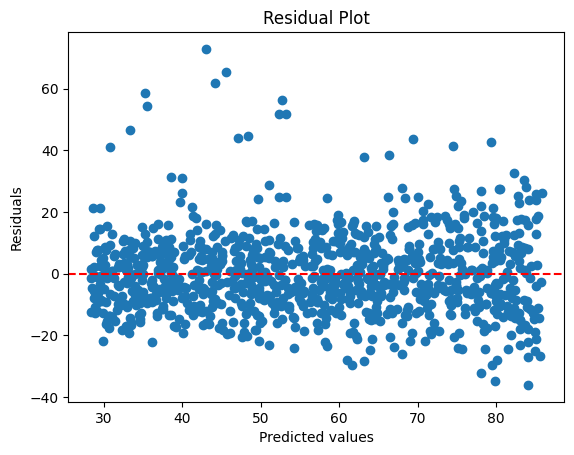

In [43]:
from sklearn.linear_model import LinearRegression

X = df[["Distance_km"]]  # try with one feature
y = df["Delivery_Time_min"]

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(y_pred, y - y_pred)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Example: Assuming df is your dataset
X = df.drop("Delivery_Time_min", axis=1)  # features
y = df["Delivery_Time_min"]               # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Metrics
print("Gradient Boosting R²:", r2_score(y_test, y_pred))

Gradient Boosting R²: 0.770041019796964


In [46]:
pip install catboost


   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.5 MB 2.6 MB/s eta 0:00:40
   ---------------------------------------- 1.0/102.5 MB 2.6 MB/s eta 0:00:39
    --------------------------------------- 2.1/102.5 MB 2.9 MB/s eta 0:00:36
   - -------------------------------------- 2.6/102.5 MB 2.8 MB/s eta 0:00:36
   - -------------------------------------- 3.4/102.5 MB 3.0 MB/s eta 0:00:33
   - -------------------------------------- 3.9/102.5 MB 3.2 MB/s eta 0:00:32
   - -------------------------------------- 4.7/102.5 MB 3.1 MB/s eta 0:00:32
   - -------------------------------------- 5.0/102.5 MB 3.0 MB/s eta 0:00:33
   - -------------------------------------- 5.0/102.5 MB 3.0 MB/s eta 0:00:33
   -- ------------------------------------- 5.5/102.5 MB 2.5 MB/s eta 0:00:39
   -- -

In [54]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Features & target
X = df.drop("Delivery_Time_min", axis=1)
y = df["Delivery_Time_min"]

# Convert categorical features to string and handle NaN
categorical_features = ["Weather", "Traffic_Level", "Vehicle_Type", "Time_of_Day"]
for col in categorical_features:
    X[col] = X[col].astype(str).fillna("Unknown")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
cat_model = CatBoostRegressor(
    iterations=800,
    depth=6,
    learning_rate=0.1,
    loss_function="RMSE",
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train, cat_features=categorical_features)

# Predictions
y_pred_cat = cat_model.predict(X_test)

# Metrics
print("CatBoost R²:", r2_score(y_test, y_pred_cat))

0:	learn: 20.8881270	total: 46.1ms	remaining: 36.9s
100:	learn: 8.8661246	total: 2.04s	remaining: 14.1s
200:	learn: 7.1807938	total: 4.23s	remaining: 12.6s
300:	learn: 6.0584735	total: 6.36s	remaining: 10.5s
400:	learn: 5.2948416	total: 8.78s	remaining: 8.74s
500:	learn: 4.6253509	total: 11s	remaining: 6.56s
600:	learn: 4.0359247	total: 13.1s	remaining: 4.33s
700:	learn: 3.5759578	total: 15.3s	remaining: 2.16s
799:	learn: 3.1429895	total: 17.4s	remaining: 0us
CatBoost R²: 0.7862639570640086
